In [1]:
# default_exp data

# Exploratory Dataset Analysis

In [2]:
#hide
from nbdev.showdoc import *

In [4]:
import warnings
warnings.filterwarnings('ignore')
from nfwk.data import *
from fastai.vision.all import *
from fastai.medical.imaging import *
from tqdm import tqdm
import wandb
from dotenv import load_dotenv

In [5]:
!pip list | grep "torch\|cuda\|fast"

fastai                        2.4
fastcore                      1.3.20
fastprogress                  1.0.0
fastrelease                   0.1.11
torch                         1.9.0
torchvision                   0.10.0


In [6]:
torch.cuda.is_available()

True

In [7]:
path = setup('siim-covid19-detection')

In [8]:
train_image_level = pd.read_csv(path/'train_image_level.csv')
train_study_level = pd.read_csv(path/'train_study_level.csv')
sample_submission = pd.read_csv(path/'sample_submission.csv')

In [9]:

# XRAY Files
# Read DICOM files
train_dcm = get_dicom_files(path/'train/', recurse=True)
test_dcm = get_dicom_files(path/'test/', recurse=True)

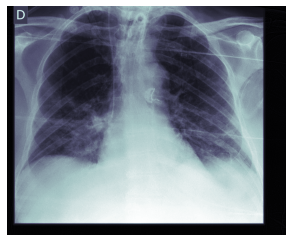

In [10]:
# Looking on a sample XRAY
xray_sample = train_dcm[7].dcmread()
xray_sample.show()

In [ ]:
#df_train_dcm = pd.DataFrame.from_dicoms(tqdm(train_dcm))

In [ ]:
#df_test_dcm = pd.DataFrame.from_dicoms(tqdm(test_dcm))

In [ ]:
# with open(path/'df_train_dcm.pickle', 'wb') as handle:
#     pickle.dump(df_train_dcm, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open(path/'df_test_dcm.pickle', 'wb') as handle:
#     pickle.dump(df_test_dcm, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [11]:
with open(path/'df_train_dcm.pickle', 'rb') as handle:
    df_train_dcm = pickle.load(handle)
with open(path/'df_test_dcm.pickle', 'rb') as handle:
    df_test_dcm = pickle.load(handle)

In [12]:
[host] = !hostname
host

'lisa-153'

In [13]:
with wandb.init(project='siim-covid19', entity='nido', job_type="pre-process") as run:
  dfs = wandb.Artifact('siim-covid19-processed', type="data-frame",
      description=f'Pre-processed data-frames from dataset extracting dicom data.',
      metadata={"host": host, "path": path})
  dfs.add_file(path/'df_train_dcm.pickle')
  dfs.add_file(path/'df_test_dcm.pickle')
  # ✍️ Save the artifact to W&B.
  run.log_artifact(dfs)


Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Appending key for api.wandb.ai to your netrc file: /home/fred/.netrc


In [ ]:
df_train_dcm.head(3).T

In [ ]:
df_study = pd.read_csv(path/'train_study_level.csv')
df_study.rename({'id':'study_id',
                      'Negative for Pneumonia':'negative',
                      'Typical Appearance':'typical',
                      'Indeterminate Appearance':'indeterminate',
                      'Atypical Appearance':'atypical'}, axis=1, inplace=True)

In [ ]:
df_study.head(3)

In [ ]:
df_image = pd.read_csv(path/'train_image_level.csv')
df_image['study_id'] = df_image['StudyInstanceUID'].apply(lambda idx: idx+"_study")
df_image.head(1)

In [ ]:
df_annotations = df_image.merge(df_study, on='study_id', how='outer')
df_annotations = df_annotations.drop(columns=['StudyInstanceUID'])
df_annotations['id'] = df_annotations['id'].str.replace('_image', '')
df_annotations.head(1)

In [ ]:
path = setup('')/"train"
path

In [ ]:
files = get_image_files(path)

In [ ]:
files[0]

In [ ]:
len(files)

In [ ]:
def label_func(f):
    return str(f)

In [ ]:
dls = ImageDataLoaders.from_name_func(path, files, label_func=label_func)

In [ ]:
label_func(files[0])

In [ ]:
show_doc(ImageDataLoaders.from_path_func)

In [ ]:
dls = ImageDataLoaders.from_path_func(path, files, label_func).cuda()


In [ ]:
dls.show_batch()

In [ ]:
fnmsTrain = !ls $path/"train"
lbls = pd.DataFrame([label_func(n) for n in fnmsTrain])
pd.DataFrame.value_counts(lbls)

In [ ]:
lbls.describe()